### Simple Convolution Neural network model to classify Traffic signs.

In this code, we implement Convolution neural network model to classify the traffic signs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data_dir = pathlib.Path('GTSRB_subset_2')   #Folder path containing data (download from datasets folder)

#print(list(data_dir.glob('*/*.jpg'))[:5])

image_count = len(list(data_dir.glob('*/*.jpg')))   ##Calcuate total images
print("Total Images: ",image_count)


# Since data is images separated in different folders, we can label them and create a dictionary 
#to hold labels mapped to file paths. 

Signs_images_dict = {
    'Snow': list(data_dir.glob('class1/*')),
    'Speed20': list(data_dir.glob('class2/*'))
}


#Dictionary to map labels to class numbers.
Signs_labels_dict = {
    'Snow': 0,
    'Speed20': 1,
}


X_Images, Y_Labels = [], []


# Process images and labels and add to array. We fetch image class and images from their file path, 
# resize to 64x64 then add to list.

for Sign_name, images in Signs_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(64,64))
        X_Images.append(resized_img)
        Y_Labels.append(Signs_labels_dict[Sign_name])



#Convert List to numpy arrays
X_Images = np.array(X_Images)
Y_Labels = np.array(Y_Labels)

#Split Total images to Train and Test
X_train_1, X_test, Y_train_1, Y_test = train_test_split(X_Images, Y_Labels, test_size=0.2, random_state=2, stratify=Y_Labels)

#Split Train images to Train and Validation
X_train, X_Val, Y_train, Y_Val = train_test_split(X_train_1, Y_train_1, test_size=0.1, random_state=2, stratify=Y_train_1)


# convert class vectors to binary class matrices
Y_train_cat = keras.utils.to_categorical(Y_train, 2)
Y_Val_cat = keras.utils.to_categorical(Y_Val, 2)
Y_test_cat = keras.utils.to_categorical(Y_test,2)


X_train, X_Val, X_test = X_train / 255.0, X_Val / 255.0, X_test / 255.0  #Normalize data 


print("Training Data:")
print(X_train.shape)
print(Y_train.shape)
print()

print("Validation Data:")
print(X_Val.shape)
print(Y_Val.shape)
print()

print("Test Data:")
print(X_test.shape)
print(Y_test.shape)
print()


Total Images:  660
Training Data:
(475, 64, 64, 3)
(475,)

Validation Data:
(53, 64, 64, 3)
(53,)

Test Data:
(132, 64, 64, 3)
(132,)



#### Create a CNN model

In [19]:
model = Sequential()

#model.add(keras.layers.Flatten(input_shape=(64,64,3)))  # Flatten input image to a vector
model.add(keras.layers.Input(shape=(64,64,3)))

model.add(keras.layers.Conv2D(10,kernel_size=(3,3),strides=(2,2), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(10,kernel_size=(3,3),strides=(2,2), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten()) # Flatten

model.add(keras.layers.Dense(2,activation='sigmoid'))

keras.optimizers.SGD(learning_rate=0.08)  #SGD Optimiser

loss_fun = keras.losses.BinaryCrossentropy()

model.compile(loss=loss_fun, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 31, 31, 10)        280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 10)          910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 182       
Total params: 1,372
Trainable params: 1,372
Non-trainable params: 0
____________________________________________________

#### Train the model and fetch accuracy

Epoch 1/20
60/60 [==============================] - 2s 14ms/step - loss: 0.6641 - accuracy: 0.7053 - val_loss: 0.6285 - val_accuracy: 0.6792
Epoch 2/20
60/60 [==============================] - 1s 11ms/step - loss: 0.5500 - accuracy: 0.8000 - val_loss: 0.4673 - val_accuracy: 0.9811
Epoch 3/20
60/60 [==============================] - 1s 10ms/step - loss: 0.4277 - accuracy: 0.9011 - val_loss: 0.3425 - val_accuracy: 0.8868
Epoch 4/20
60/60 [==============================] - 1s 10ms/step - loss: 0.3085 - accuracy: 0.9368 - val_loss: 0.2321 - val_accuracy: 0.9811
Epoch 5/20
60/60 [==============================] - 1s 10ms/step - loss: 0.2382 - accuracy: 0.9474 - val_loss: 0.1583 - val_accuracy: 1.0000
Epoch 6/20
60/60 [==============================] - 1s 11ms/step - loss: 0.1864 - accuracy: 0.9432 - val_loss: 0.1244 - val_accuracy: 0.9811
Epoch 7/20
60/60 [==============================] - 1s 11ms/step - loss: 0.1434 - accuracy: 0.9621 - val_loss: 0.1043 - val_accuracy: 0.9811
Epoch 8/20
60

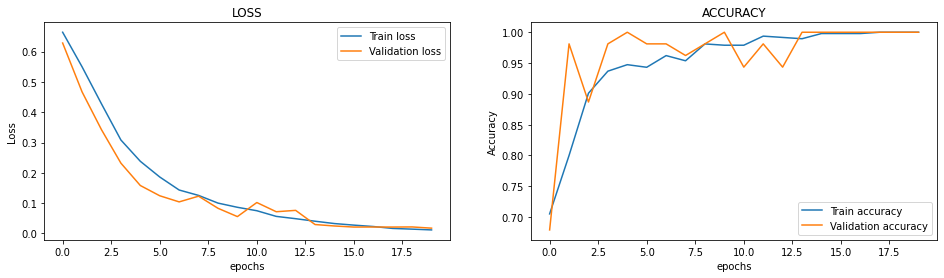

In [20]:
##Since samples are less, it would be better to reduce batch size so that gradient updates more frequently.

#TRAIN THE MODEL
tr_hist = model.fit(X_train, Y_train_cat, batch_size=8, epochs=20, verbose=1, validation_data=(X_Val, Y_Val_cat))

print()
acc = model.evaluate(X_test, Y_test_cat, verbose=1)    #Test Data Accuracy
print(f'Accuracy of Test data is: {acc[1]*100} %')

#Plot graphs
plt.figure(figsize=(16,4))  
plt.subplot(1, 2, 1)

plt.plot(tr_hist.history['loss'],label="Train loss")
plt.plot(tr_hist.history['val_loss'],label="Validation loss", linestyle='-')
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(tr_hist.history['accuracy'],label="Train accuracy")
plt.plot(tr_hist.history['val_accuracy'],label="Validation accuracy", linestyle='-')
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()


**Check their classification report**

In [21]:
BATCH = model.predict(X_test)
BA=np.round(BATCH)
print(classification_report(Y_test_cat, BA, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       1.00      1.00      1.00        42

   micro avg       1.00      0.99      1.00       132
   macro avg       1.00      0.99      1.00       132
weighted avg       1.00      0.99      1.00       132
 samples avg       0.99      0.99      0.99       132

